In [19]:
import os
import numpy as np
filename = '.\post-process-out-of-focus.tif'
from matplotlib import pyplot as plt
from skimage import data, io, exposure, filters, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
droplets = io.imread(filename)

In [6]:
from __future__ import print_function
import sys; print(sys.version)
import platform; print(platform.platform())
import skimage; print("scikit-image version: {}".format(skimage.__version__))
import numpy; print("numpy version: {}".format(numpy.__version__))

3.8.5 (default, Aug  5 2020, 09:44:06) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.19041-SP0
scikit-image version: 0.18.1
numpy version: 1.19.1


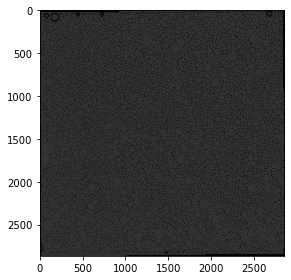

In [7]:
io.imshow(droplets)
io.show()

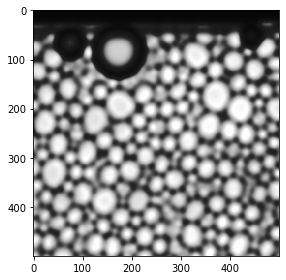

In [36]:
gauss = filters.gaussian(droplets[0:500,0:500],5)
io.imshow(exposure.equalize_hist(gauss))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


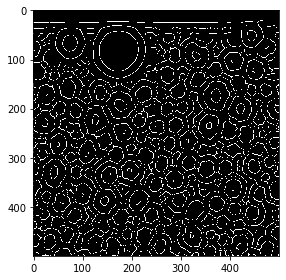

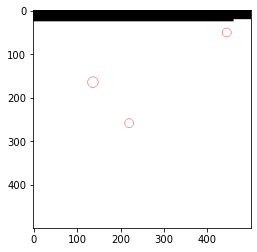

In [47]:

image = droplets[0:500,0:500]
edges = canny(image, sigma=5, low_threshold=50, high_threshold=100)
io.imshow(edges)
hough_radii = np.arange(10, 1000, 2)
hough_res = hough_circle(edges, hough_radii)
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

In [51]:
2**14

16384